In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
def normContinuousAttributes(df,labels):
    for i in labels:
        df[i] = df[[i]].apply(lambda x : (x - np.min(x))/(np.max(x) - np.min(x)))
    return df

In [3]:
def plotHisto(df):
    fig = plt.figure(figsize=(20,15))  #Creating a new figure with the mentioned figure size
    cols = 4         # No of columns to display the charts
    rows = 4         # No of rows to display the charts. These numbers are chosen as we have 16 attributes
                 # Alternatively, *rows = math.ceil(float(df.shape[1]) / cols)* 
                 # can be used when there are indefinete number of attributes.

    for i, column in enumerate(df.columns):
        ax = fig.add_subplot(rows, cols, i+1)      #Adds a subplot in the i+1 th position
        ax.set_title(column)
        if df.dtypes[column] == np.object:         #For categorical attributes.
            df[column].value_counts().plot(kind="bar", axes=ax)
        else:
            df[column].hist(axes=ax)               #For conitnous attributes
            plt.xticks(rotation="vertical")

    plt.subplots_adjust(hspace=0.7, wspace=0.2)    # To adjust the plots and their labels
    plt.show()

In [4]:
def boxplot(df):
    fig, ax = plt.subplots(figsize=(10,10))
    df.boxplot(ax=ax)
    plt.show()

In [5]:
def densityPlot(df):
    df.plot(kind='density', subplots=True, layout=(4,4), sharex=False)
    plt.show()

In [6]:
def corrMatrix(data):
    correlations = data.corr()
    names = data.columns
    # plot correlation matrix
    fig = plt.figure(figsize=(20,15))
    ax = fig.add_subplot(111)
    cax = ax.matshow(correlations, vmin=-1, vmax=1)
    fig.colorbar(cax)
    ticks = np.arange(0,9,1)
    ax.set_xticks(ticks)
    ax.set_yticks(ticks)
    ax.set_xticklabels(names)
    ax.set_yticklabels(names)
    plt.show()

In [7]:
def meanMedianMinMaxVar(df,label):
    temp = []
    temp.append(np.mean(df[label]))
    temp.append(np.median(df[label]))
    temp.append(np.max(df[label]))
    temp.append(np.min(df[label]))
    temp.append(np.var(df[label]))
    return temp

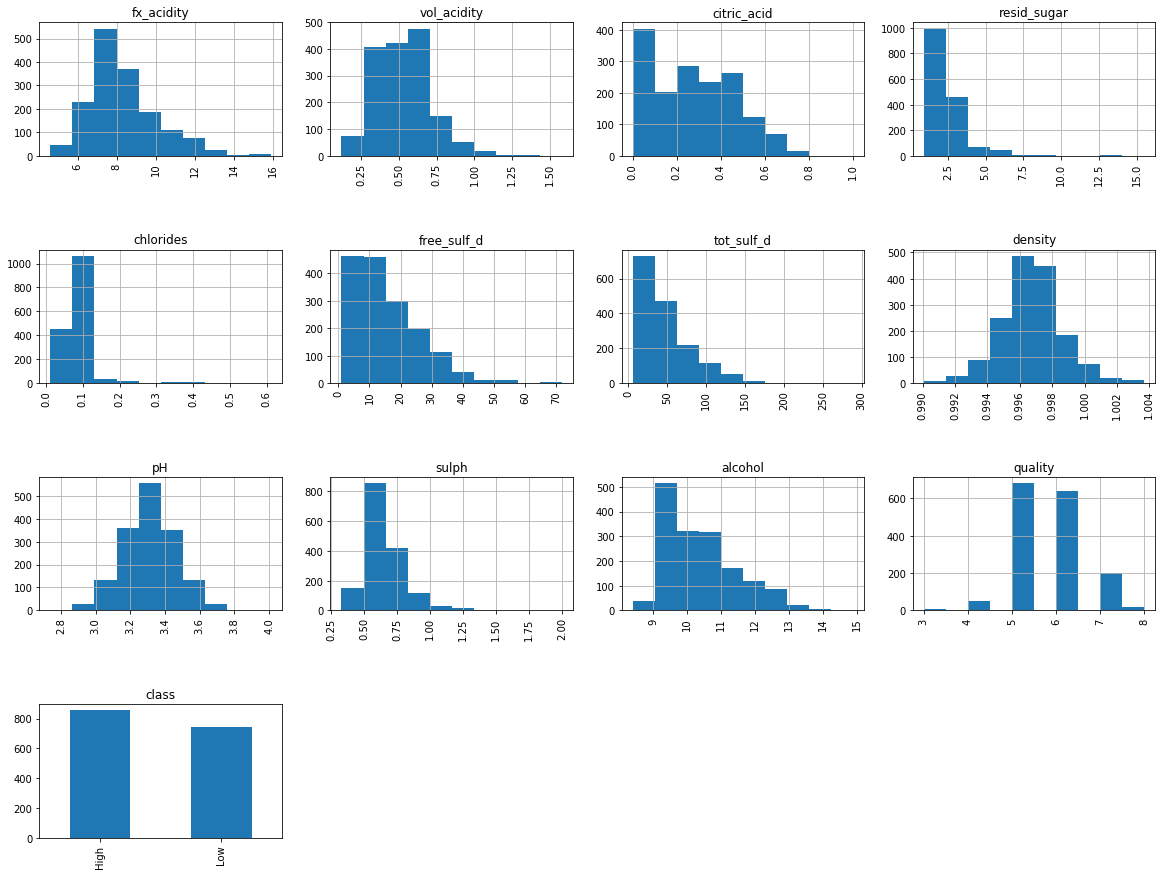

In [8]:
df = pd.read_csv("wine.csv")
del df["ID"]
plotHisto(df)

In [9]:
#densityPlot(df)

In [10]:
#corrMatrix(df)

In [11]:
# label = "alcohol"
# print(meanMedianMinMaxVar(df,label))
# df[label].value_counts()

In [12]:
# x = list(range(0,len(df["fx_acidity"])))
# plt.scatter(df["fx_acidity"],x, marker='*',label="Fixed Acidity")
# plt.title("Fixed Acidity")
# plt.legend()
# plt.show()

In [13]:
del df["quality"]
#print(df.columns)
#df.head()
labels = df.columns
labels = labels[0:len(labels)-1]
#print(labels)
#normContinuousAttributes(df,labels)
df.to_csv("modified_wine.csv")

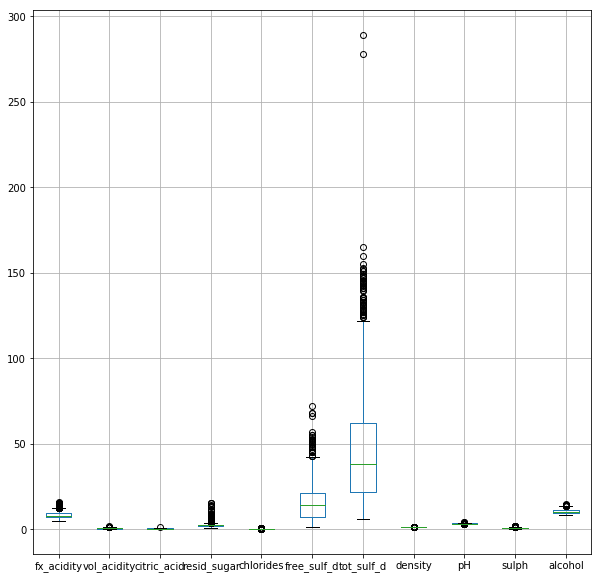

In [14]:
boxplot(df)